In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

url = 'https://www.audible.com/adblbestsellers?ref_pageloadid=h7Ag5cGcQ5yvRAVu&ref=a_search_b1_desktop_footer_column_2_0&pf_rd_p=6a55a63d-48d3-4d5e-857f-ae6682380e4d&pf_rd_r=65QXM553SAAQNRH2VDV2&pageLoadId=yGFSdjIrgVpQDcAP&ref_plink=not_applicable&creativeId=2d835e86-1f10-4f6e-a4c6-33d2001684e6'

In [2]:
driver = webdriver.Chrome(service = ChromeService(ChromeDriverManager().install()))

In [3]:
driver.get(url)

In [4]:
container = driver.find_element(By.CLASS_NAME, 'adbl-impression-container')

In [5]:
products = container.find_elements(By.XPATH, './/li[contains(@class, "productListItem")]')

In [6]:
titles = []
list_numbers = []
for product in products:
    book = product.find_element(By.XPATH, './/h3[contains(@class, "bc-heading")]').text.split('. ')
    list_numbers.append(book[0])
    titles.append(book[1])

In [7]:
authors = []
for product in products:
    name = product.find_element(By.XPATH, './/li[contains(@class, "authorLabel")]').text
    authors.append(name[4:])

In [8]:
runtimes = []
for product in products:
    rtime = product.find_element(By.XPATH, './/li[contains(@class, "runtimeLabel")]').text
    runtimes.append(rtime[8:])

In [9]:
release_dates = []
for product in products:
    date = product.find_element(By.XPATH, './/li[contains(@class, "releaseDateLabel")]').text
    release_dates.append(date[14:])

In [10]:
bestsellers = pd.DataFrame({"title" : titles, "author" : authors, "runtime" : runtimes, "release_date" : release_dates, "list_number" : list_numbers})

In [11]:
bestsellers.to_csv('./audiobooks.csv', index=False)

In [12]:
driver.find_element(By.XPATH, './/span[contains(@class, "nextButton")]').click()


In [13]:
container = driver.find_element(By.CLASS_NAME, 'adbl-impression-container')
products = container.find_elements(By.XPATH, './/li[contains(@class, "productListItem")]')
for product in products:
    book = product.find_element(By.XPATH, './/h3[contains(@class, "bc-heading")]').text.split('. ')
    list_numbers.append(book[0])
    titles.append(book[1])

In [14]:
titles

['The Woman in Me',
 'Worthy',
 'Atomic Habits',
 'Killers of the Flower Moon',
 'The Exchange',
 'Lessons in Chemistry',
 'Elon Musk',
 'Tom Lake',
 'Fourth Wing',
 'Slayers: A Buffyverse Story',
 'Be Useful',
 'Prequel',
 'None of This Is True',
 'Holly',
 'A Court of Thorns and Roses',
 'The 4-Hour Body',
 'Greenlights',
 'Going Infinite',
 "Harry Potter and the Sorcerer's Stone, Book 1",
 'Thicker than Water',
 'I Must Say',
 'The Covenant of Water',
 "Can't Hurt Me",
 'The Subtle Art of Not Giving a F*ck',
 'Iron Flame',
 'Outlive',
 'The Housemaid',
 'Demon Copperhead',
 '12 Rules for Life',
 'Enough',
 'Third Eye',
 'Verity',
 'The Body Keeps the Score',
 'A Court of Mist and Fury',
 "I'm Glad My Mom Died",
 'Harry Potter and the Chamber of Secrets, Book 2',
 'The Seven Husbands of Evelyn Hugo',
 'A Court of Wings and Ruin',
 'How to Win Friends & Influence People',
 'Spare']

In [15]:
bestsellers

,title,author,runtime,release_date,list_number
0,The Woman in Me,Britney Spears,5 hrs and 31 mins,10-24-23,1
1,Worthy,Jada Pinkett Smith,14 hrs and 57 mins,10-17-23,2
2,Atomic Habits,James Clear,5 hrs and 35 mins,10-16-18,3
3,Killers of the Flower Moon,David Grann,9 hrs and 4 mins,04-18-17,4
4,The Exchange,John Grisham,9 hrs and 1 min,10-17-23,5
5,Lessons in Chemistry,Bonnie Garmus,11 hrs and 55 mins,04-05-22,6
6,Elon Musk,Walter Isaacson,20 hrs and 27 mins,09-12-23,7
7,Tom Lake,Ann Patchett,11 hrs and 22 mins,08-01-23,8
8,Fourth Wing,Rebecca Yarros,20 hrs and 43 mins,05-02-23,9
9,Slayers: A Buffyverse Story,"Christopher Golden, Amber Benson",8 hrs and 2 mins,10-12-23,10


### For Firefox
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager

driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))

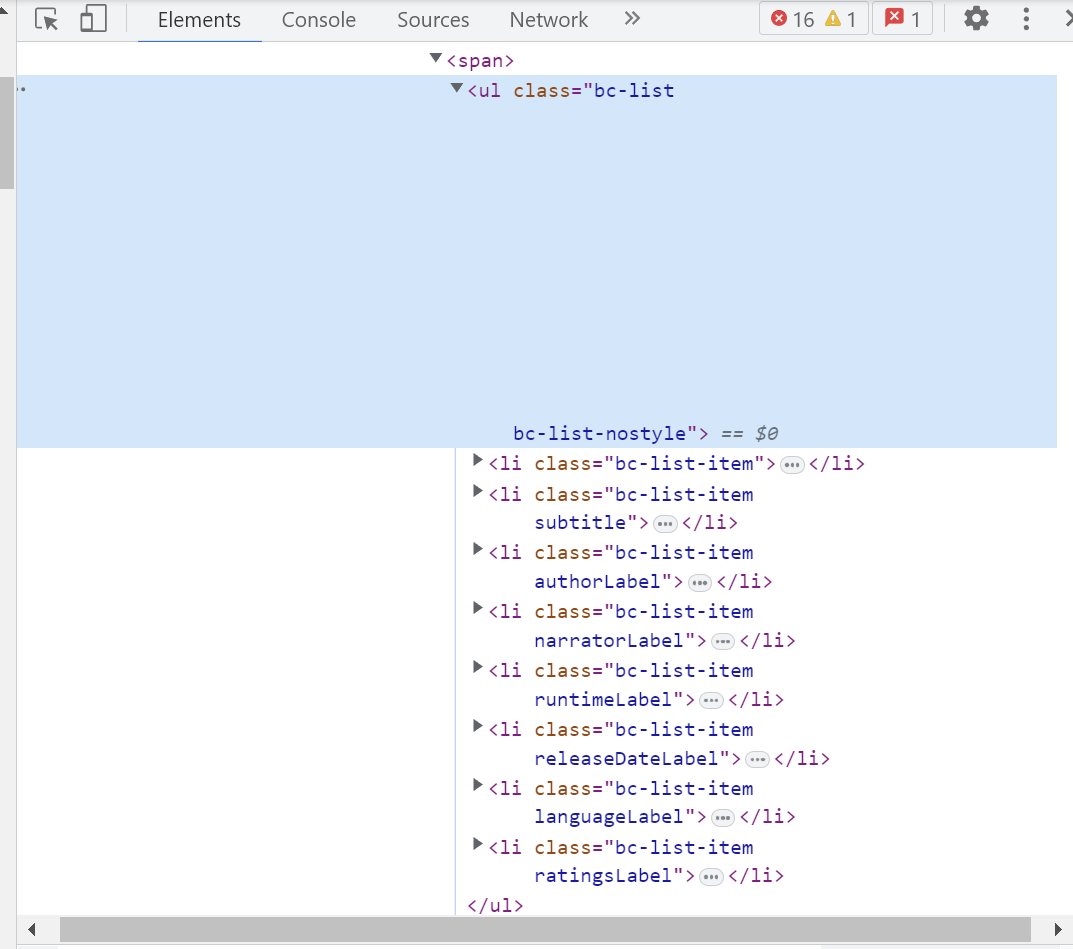

In [16]:
driver.quit()